# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [156]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [157]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [149]:
url= "http://api.openweathermap.org/data/2.5/weather"
units = "imperial"
params = { "q": city, "APPID": api_key, "units": units}
city_name = []

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")
for city in cities:
    response = requests.get(url, params=params)
    if response.status_code == 200:
        formatted_response = response.json()
        city_name.append(formatted_response)
        print(f"Processing Record {cities.index(city)} of {city}")

    else:
        print("Cannot find a city.")
print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 0 of morant bay
Processing Record 1 of sur
Processing Record 2 of port elizabeth
Processing Record 3 of sassandra
Processing Record 4 of atuona
Processing Record 5 of hermanus
Processing Record 6 of albany
Processing Record 7 of pavlohrad
Processing Record 8 of bluff
Processing Record 9 of pandan
Processing Record 10 of los llanos de aridane
Processing Record 11 of cidreira
Processing Record 12 of saurimo
Processing Record 13 of taolanaro
Processing Record 14 of salym
Processing Record 15 of grand river south east
Processing Record 16 of chokurdakh
Processing Record 17 of velikiy ustyug
Processing Record 18 of sentyabrskiy
Processing Record 19 of rikitea
Processing Record 20 of irbit
Processing Record 21 of torbay
Processing Record 22 of kaitangata
Processing Record 23 of ribeira grande
Processing Record 24 of thompson
Processing Record 25 of codrington
Proces

Processing Record 239 of nanortalik
Processing Record 240 of changji
Processing Record 241 of alexandria
Processing Record 242 of durg
Processing Record 243 of morondava
Processing Record 244 of khandyga
Processing Record 245 of manggar
Processing Record 246 of sharjah
Processing Record 247 of makakilo city
Processing Record 248 of hasaki
Processing Record 249 of ust-omchug
Processing Record 250 of van buren
Processing Record 251 of rajur
Processing Record 252 of sile
Processing Record 253 of santa isabel
Processing Record 254 of palabuhanratu
Processing Record 255 of lasa
Processing Record 256 of adrar
Processing Record 257 of mettlach
Processing Record 258 of margate
Processing Record 259 of patan
Processing Record 260 of rahimatpur
Processing Record 261 of haines junction
Processing Record 262 of ambilobe
Processing Record 263 of ruatoria
Processing Record 264 of khvorostyanka
Processing Record 265 of salalah
Processing Record 266 of troitsko-pechorsk
Processing Record 267 of porto 

Processing Record 480 of porto santo
Processing Record 481 of ilulissat
Processing Record 482 of ust-kut
Processing Record 483 of birobidzhan
Processing Record 484 of bondo
Processing Record 485 of gorele
Processing Record 486 of katete
Processing Record 487 of jieshi
Processing Record 488 of anshun
Processing Record 489 of moranbah
Processing Record 490 of algiers
Processing Record 491 of ostersund
Processing Record 492 of tutubigan
Processing Record 493 of pimentel
Processing Record 494 of taltal
Processing Record 495 of patrocinio
Processing Record 496 of novaya ladoga
Processing Record 497 of luorong
Processing Record 498 of lerwick
Processing Record 499 of bereda
Processing Record 500 of thinadhoo
Processing Record 501 of bethel
Processing Record 502 of seabra
Processing Record 503 of san policarpo
Processing Record 504 of buta
Processing Record 505 of te anau
Processing Record 506 of yulara
Processing Record 507 of japura
Processing Record 508 of parabel
Processing Record 509 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [150]:
# set up lists to hold reponse info
name= []
cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
temp = []
wind = []

# Building Dataframe
for cities in city_name:
    name.append(cities['name'])
    cloudiness.append(cities['clouds']['all'])
    country.append(cities['sys']['country'])
    date.append(cities['dt'])
    humidity.append(cities['main']['humidity'])
    lat.append(cities['coord']['lat'])
    lng.append(cities['coord']['lon'])
    temp.append(cities['main']['temp_max'])
    wind.append(cities['wind']['speed'])
    

weather_cities = pd.DataFrame({"City":name,
                          "Cloudiness": cloudiness,
                          "Country":country,
                          "Date":date,
                          "Humidity":humidity,
                          "Latitude":lat,
                          "Lng":lng,
                          "Max Temp":temp,
                          "Wind Speed":wind})

#export to csv file
weather_cities.to_csv("weather_data.csv")

weather_cities.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Lng,Max Temp,Wind Speed
0,Puerto Ayora,75,EC,1570033093,64,-0.74,-90.35,75.2,12.75
1,Puerto Ayora,75,EC,1570033093,64,-0.74,-90.35,75.2,12.75
2,Puerto Ayora,75,EC,1570033093,64,-0.74,-90.35,75.2,12.75
3,Puerto Ayora,75,EC,1570033093,64,-0.74,-90.35,75.2,12.75
4,Puerto Ayora,75,EC,1570033093,64,-0.74,-90.35,75.2,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

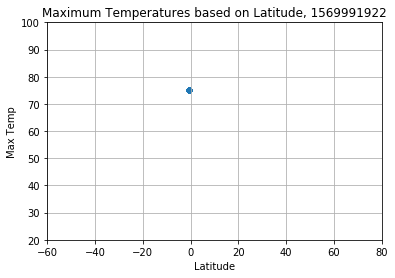

In [151]:
# Build a scatter plot for each data type
weather_cities.plot(kind="scatter", x="Latitude" ,y="Max Temp")

# Incorporate the other graph properties
plt.grid()
plt.title(f"Maximum Temperatures based on Latitude, {cities_df['Date'][0]}")
plt.xlim(-60, 80)
plt.ylim(20, 100)
# Save the figure
plt.savefig("latVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

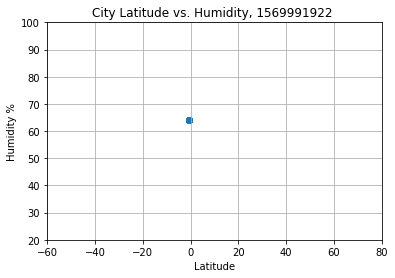

In [152]:
plt.scatter(weather_cities["Latitude"], weather_cities["Humidity"], marker="o")
plt.title(f"City Latitude vs. Humidity, {cities_df['Date'][0]} ")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

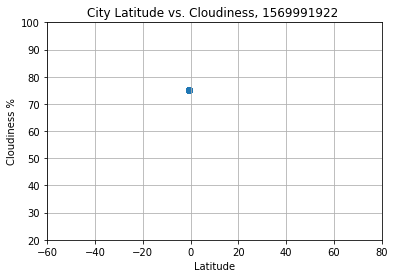

In [153]:
plt.scatter(weather_cities["Latitude"], weather_cities["Cloudiness"], marker="o")
plt.title(f"City Latitude vs. Cloudiness, {cities_df['Date'][0]} ")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

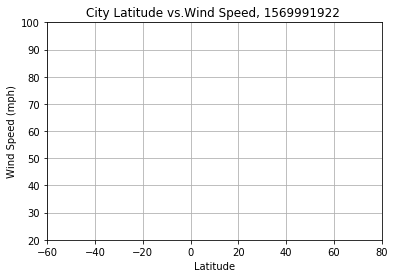

In [154]:
plt.scatter(weather_cities["Latitude"], weather_cities["Wind Speed"], marker="o")
plt.title(f"City Latitude vs.Wind Speed, {cities_df['Date'][0]} ")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-60, 80)
plt.ylim(20, 100)
plt.grid(True)
# Save the figure
plt.savefig("latVsWindSpeed.png")

# Show plot
plt.show()

In [155]:
#1-Moving away from the equator makes the temperature changes (high to low). However, the max temperature is not 
    #at the equator, but little below the equator. 

#2- The most collest and the most warmest places have the most humidity
#3- wind speed (20-30mph)is consistent between latitute(-10- 10) and(20-80). 